# Data Analysis Game Strategy

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('data/statistical.csv')
df.head()

,Strategy,Score,Number of moves,Highest tile,Game over
0,Left Down,2,1,2,False
1,Left Down,4,2,2,False
2,Left Down,6,3,4,False
3,Left Down,8,4,4,False
4,Left Down,10,5,4,False


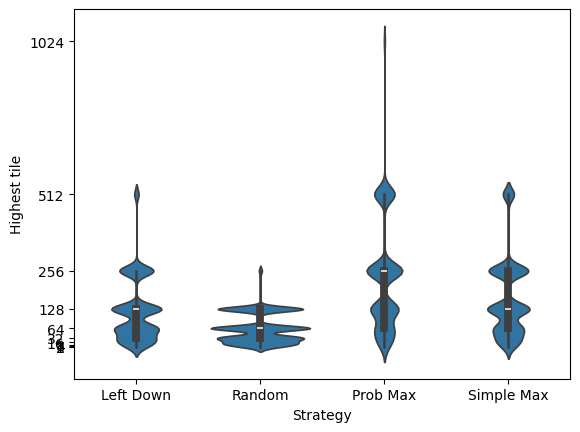

In [45]:
sns.violinplot(x='Strategy', y='Highest tile', data=df)
plt.yticks(np.logspace(0, np.log2(df['Highest tile'].max()), base=2, num=int(np.log2(df['Highest tile'].max())) + 1))
plt.savefig('img/game_strategy.png')
plt.show()

In [42]:
max(df['Number of moves'])

625